# Analysis of UQ runs
These notebooks will be used to plot data and data analysis for UQ runs for SOFE 2023.

I have optimised more things in this second set of runs. Optimised run just optimises the two biggest factors, aspect and tbrnmn.

In optimised run 2I have also optimised etath and ralpne.

## Import the Uncertainty Data and create object

## Calculate Sensitivity Indices and Reliability

In [1]:
%load_ext autoreload
%autoreload 1
from pathlib import Path
from bokeh.plotting import figure, show
import sys
sys.path.append('/home/graeme/process_uq/')
sys.path.append('/home/graeme/PROCESS_SALib/')
from uq_analysis import UncertaintyData, Copula, CopulaAnalysis
# from bokeh.plotting import figure 
from bokeh.io import output_notebook
output_notebook()

proj_dir = str(Path.cwd())+"/"
proj_dir = "/home/graeme/data/uq_run_data/paper_runs/demo_opt_analysis/output2/"
figure_of_merit = "rmajor"
uq_data = UncertaintyData(proj_dir, figure_of_merit,use_scoping_data=False)


Loading BokehJS ...

In [2]:
uq_data.calculate_sensitivity(figure_of_merit)
uq_data.calculate_failure_probability()
print("Number of samples: ", len(uq_data.uncertainties_df))
print("Number of converged runs: ",uq_data.number_of_converged_runs,)
print("Failure Rate: ", uq_data.failure_probability,"+/-", uq_data.failure_cov)


Number of samples:  1179
Number of converged runs:  261
Failure Rate:  0.78 +/- 0.02


## Regional Sensitivity - what causes PROCESS to converge?

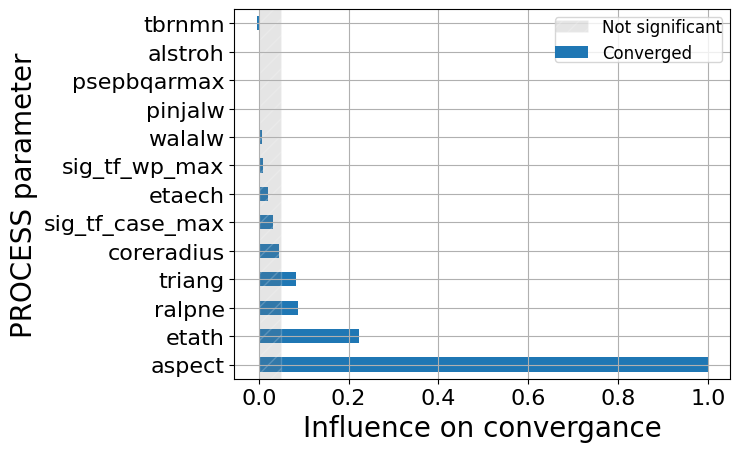

significant converegence variables ['aspect', 'etath', 'ralpne', 'triang']


In [3]:
uq_data.convergence_regional_sensitivity_analysis(uq_data.input_names)
uq_data.plot_sumsq_sensitivity()
significant_conv_vars = uq_data.find_significant_parameters(uq_data.sumsq_sensitivity_df,"unconverged",0.05).tolist()
print("significant converegence variables",significant_conv_vars)


## Find the iteration variables which are influential for the significant convergence variables

In [4]:
copula = Copula(uq_data.converged_df,significant_conv_vars,copula_type="unbounded")
copula.calculate_copula(synthetic_sample_size=50000)
copula.calculate_pdf()
copula.copula_data_dict()
pdf_df=copula.create_pdf_df()
copula.find_max_pdf(print_data=False)
copula_correlation_matrix = copula.correlation_matrix()


/home/graeme/process_uq/uqenv/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:5999: RuntimeWarning: divide by zero encountered in divide
  return c**2 / (c**2 - n**2)


In [5]:
custom_data = {"aspect":3.0,"etath":0.375}
conv_copula_analysis=CopulaAnalysis(uq_data,copula,num_intervals=16)#,custom_data_point=custom_data)
conv_network= conv_copula_analysis.correlation_network(copula.correlation_matrix(),threshold=0.3,variables=significant_conv_vars)
conv_copula_analysis.plot_network(conv_network,fig_height=500,fig_width=500)
show(conv_copula_analysis.create_graph_grid(significant_conv_vars))
show(conv_copula_analysis.create_datatable(significant_conv_vars))

[2.2562  2.33128 2.40636 2.48144 2.55652 2.6316  2.70668 2.78176 2.85684
 2.93192 3.007   3.08208 3.15716 3.23224 3.30732 3.3824 ]
[0.30877687 0.31938974 0.33000262 0.3406155  0.35122837 0.36184125
 0.37245412 0.383067   0.39367987 0.40429275 0.41490562 0.4255185
 0.43613137 0.44674425 0.45735712 0.46797   ]
[0.05371183 0.05699098 0.06027013 0.06354928 0.06682843 0.07010758
 0.07338673 0.07666587 0.07994502 0.08322417 0.08650332 0.08978247
 0.09306162 0.09634077 0.09961992 0.10289906]
[0.40008    0.41339667 0.42671333 0.44003    0.45334667 0.46666333
 0.47998    0.49329667 0.50661333 0.51993    0.53324667 0.54656333
 0.55988    0.57319667 0.58651333 0.59983   ]


## Create a copula based on the important variables for convergence and iteration variables

In [6]:
all_variables = significant_conv_vars + ["sig_tf_case_max","sig_tf_wp_max","alstroh","rmajor",'bt', 'beta', 'jwptf', 'fcutfsu', 'plhthresh', 'wallmw', 'dene', 'ohcth', 'bore', 'coheof', 'powfmw', 'cohbop', 'te', 'bigq', 'tfcth', 'tdmptf', 'vtfskv']
vars_to_model = []
for item in all_variables:
    if item not in vars_to_model:
        vars_to_model.append(item)
print(vars_to_model)
itv_copula = Copula(uq_data.converged_df,vars_to_model, copula_type="unbounded")
itv_copula.calculate_copula(synthetic_sample_size=5000)
itv_copula.calculate_pdf()
itv_pdf_df=itv_copula.create_pdf_df()
itv_copula.copula_data_dict()


['aspect', 'etath', 'ralpne', 'triang', 'sig_tf_case_max', 'sig_tf_wp_max', 'alstroh', 'rmajor', 'bt', 'beta', 'jwptf', 'fcutfsu', 'plhthresh', 'wallmw', 'dene', 'ohcth', 'bore', 'coheof', 'powfmw', 'cohbop', 'te', 'bigq', 'tfcth', 'tdmptf', 'vtfskv']


/home/graeme/process_uq/uqenv/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:5999: RuntimeWarning: divide by zero encountered in divide
  return c**2 / (c**2 - n**2)
/home/graeme/process_uq/uqenv/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:719: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/home/graeme/process_uq/uqenv/lib/python3.10/site-packages/copulas/univariate/truncated_gaussian.py:45: RuntimeWarning: divide by zero encountered in scalar divide
  a = (self.min - loc) / scale
/home/graeme/process_uq/uqenv/lib/python3.10/site-packages/copulas/univariate/truncated_gaussian.py:46: RuntimeWarning: divide by zero encountered in scalar divide
  b = (self.max - loc) / scale
/home/graeme/process_uq/uqenv/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.


In [7]:
itv_correlation_matrix = itv_copula.correlation_matrix()
custom_data = {"aspect":2.80,"etath":0.40,"ralpne":0.08,"triang":0.46}
itv_conv_copula_analysis=CopulaAnalysis(uq_data,itv_copula,num_intervals=10,custom_data_point=custom_data)
itv_correlation_matrix = itv_copula.correlation_matrix()
itv_network = itv_conv_copula_analysis.correlation_network(itv_copula.correlation_matrix(),threshold=0.5,variables=significant_conv_vars)
itv_conv_copula_analysis.plot_network(itv_network)
show(itv_conv_copula_analysis.create_datatable(vars_to_model))